# Business Understanding

Een gameontwikkelaar heeft ons gevraagd om te kijken wat de beste eigenschappen van een game zijn, om zo zelf een succesvolle game te kunnen maken voor de app store. Om dit makkelijker te kunnen onderzoeken, hebben we de hoofdvraag in meerdere deelvragen opgesplitst.

#### Hoofdvraag:
"Wat zijn de meest belangrijke kenmerken van games met hoge ratings?"

#### Deelvragen:
"Is er een trend in het releasejaar en gemiddelde prijs van games?"

"Wat is het aantal games per jaar gereleased?"

"Zit er een relatie tussen het aantal ratings en de lifetime van een game (release  tot laatste update)"

"Zit er een relatie tussen de extra genres en in-app aankopen?"

"Maakt grootte uit voor de ratings van de game?"

"Maakt het aantal games gereleased door de developer uit voor de ratings?"

"Welke taal krijgt de hoogste reviews?"

"Wat hebben de apps zonder rating gemeen?"



#### Yorben: 
Trend in jaar en gemiddelde prijs & ratings en lifetime van een game

# Data Understanding

* de dataset die er wordt toegeleverd is een bestand in csv formaat.
* de databron is makkelijk te benaderen vanuit python met behulp van pandas
* de databse bevat 17007 rijen en 18 kolommen
* de volgende kollommen staan in de database
    * `URL`: de url naar de game in de appstore
    * `ID`: unieke id voor de game
    * `name`: naam van de app
    * `subtitle`: alternative naam voor de app
    * `icon url`: url naar de icon van de app
    * `Avegage user rating`: de gemiddelde score van de app op de appstore
    * `Uer rating count`: het aantal ratings dat de app heeft
    * `price`: de aankoop prijs van de app
    * `In-app Purchases`: lijst met prijzen van in-app aankopen
    * `Description`: een omschrijving van de app
    * `Developper`: de uitgever van de app
    * `Age rating`: de aanbevolen minimumleeftijd (4+, 12+ ect.)
    * `Languages`: talen waarin de app beschikbaar is
    * `Size`: de groote van de app in bytes
    * `primary` Genre: de genre van de app (entertainment, strategie, ect.)
    * `Genres`: een lijst met overige genres waar binnen de app valt
    * `Original` realease date: de datum waarop de app werd uitgegeven
    * `current version release date`: de datum van de laatste update

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%config IPCompleter.greedy = True  
%matplotlib inline

In [2]:
game_data = pd.read_csv("appstore_games.csv")

De data is ons gegeven in een excel bestand genaamd "appstore_games.csv". 

#### Bovenste rijen:

In [3]:
game_data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


#### Grootte

In [4]:
print("Aantal Rijen: " + str(game_data.shape[0]))

Aantal Rijen: 17007


#### Kolommen

In [5]:
game_data.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

#### Types

In [6]:
game_data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

#### Lege velden?

In [7]:
game_data.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

#### Eigenschappen?

In [8]:
game_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,17007.0,1.059614e+09,2.999676e+08,284921427.0,899654330.0,1.112286e+09,1.286983e+09,1.475077e+09
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.500000e+00,4.500000e+00,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,4.600000e+01,3.090000e+02,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,5.676895e+07,1.330271e+08,4.005591e+09


# Data Preparation

#### Veld types goed maken en toevoegen

In [9]:
game_data["Original Release Date"] = pd.to_datetime(game_data["Original Release Date"])
game_data["Current Version Release Date"] = pd.to_datetime(game_data["Current Version Release Date"])
game_data["Age Rating"] = game_data["Age Rating"].astype("category")

game_data["release_year"] = game_data["Original Release Date"].dt.year
game_data["lifetime"] = game_data["Current Version Release Date"] - game_data["Original Release Date"]
game_data["Description Length"] = game_data["Description"].agg(len)

game_data["Languages"] = game_data["Languages"].fillna('')
game_data["Amount of Languages"] = game_data["Languages"].agg(len)

game_data["lifetime_in_years"] = (game_data["lifetime"].dt.days / 365).agg(round)

game_data["Amount of Languages"]

0        66
1         2
2         2
3        66
4        58
         ..
17002     2
17003     2
17004     2
17005     2
17006     6
Name: Amount of Languages, Length: 17007, dtype: int64

In [51]:
per_dev = game_data["Developer"].value_counts().to_dict()

game_data["Amount of Games per Developer"] = game_data["Developer"].map(per_dev)
game_data["Amount of Games per Developer"]
game_data[game_data["Developer"] == "EBSolutions"]["URL"]

4520    https://apps.apple.com/us/app/dark-holes/id912...
Name: URL, dtype: object

In [11]:
def GetTimeOfDeveloper(column, first):
    groupedperdev = game_data.sort_values(column).set_index("Developer").groupby("Developer")[column]
    startofdev = groupedperdev.unique().map(lambda x : x[first]).to_dict()
    return game_data["Developer"].map(startofdev)

game_data["StartOfDev"] = GetTimeOfDeveloper("Original Release Date", 0)
game_data["EndOfDev"] = GetTimeOfDeveloper("Current Version Release Date", -1)
game_data["DeveloperLifetime"] = game_data["EndOfDev"] - game_data["StartOfDev"]
game_data["DeveloperLifetime"] = pd.Series([x.days for x in game_data["DeveloperLifetime"]]).agg(abs)
game_data[["Developer","DeveloperLifetime"]].sort_values("DeveloperLifetime")

,Developer,DeveloperLifetime
17006,ming bo tang,0
5360,Offline games,0
14279,Vsevolod Azarov,0
5386,Mobirate,0
5393,jan borg,0
...,...,...
115,Tom Kerrigan,4071
36,Tom Kerrigan,4071
33,Tom Kerrigan,4071
116,Tom Kerrigan,4071


In [12]:
hasrating = game_data["User Rating Count"]>0
game_data["HasRating"] = hasrating.astype("int")


#### Lege velden invullen of weghalen

In [13]:
game_data["Price"] = game_data["Price"].fillna(0)
game_data["Subtitle"] = game_data["Subtitle"].fillna('')
game_data["Average User Rating"] = game_data["Average User Rating"].fillna(0)
game_data["User Rating Count"] = game_data["User Rating Count"].fillna(0)
game_data["Size"] = game_data["Size"].fillna(0)
game_data["In-app Purchases"] = game_data["In-app Purchases"].fillna('')

#### Data normalizeren

In [31]:
normalizedData = game_data.copy()
normalizedData = normalizedData[["Average User Rating","User Rating Count","Price","Size"
                                 ,"release_year","Description Length","Amount of Languages"
                                 ,"lifetime_in_years","Amount of Games per Developer","DeveloperLifetime","HasRating"]]
normalizedData = (normalizedData - normalizedData.min()) / (normalizedData.max() - normalizedData.min())


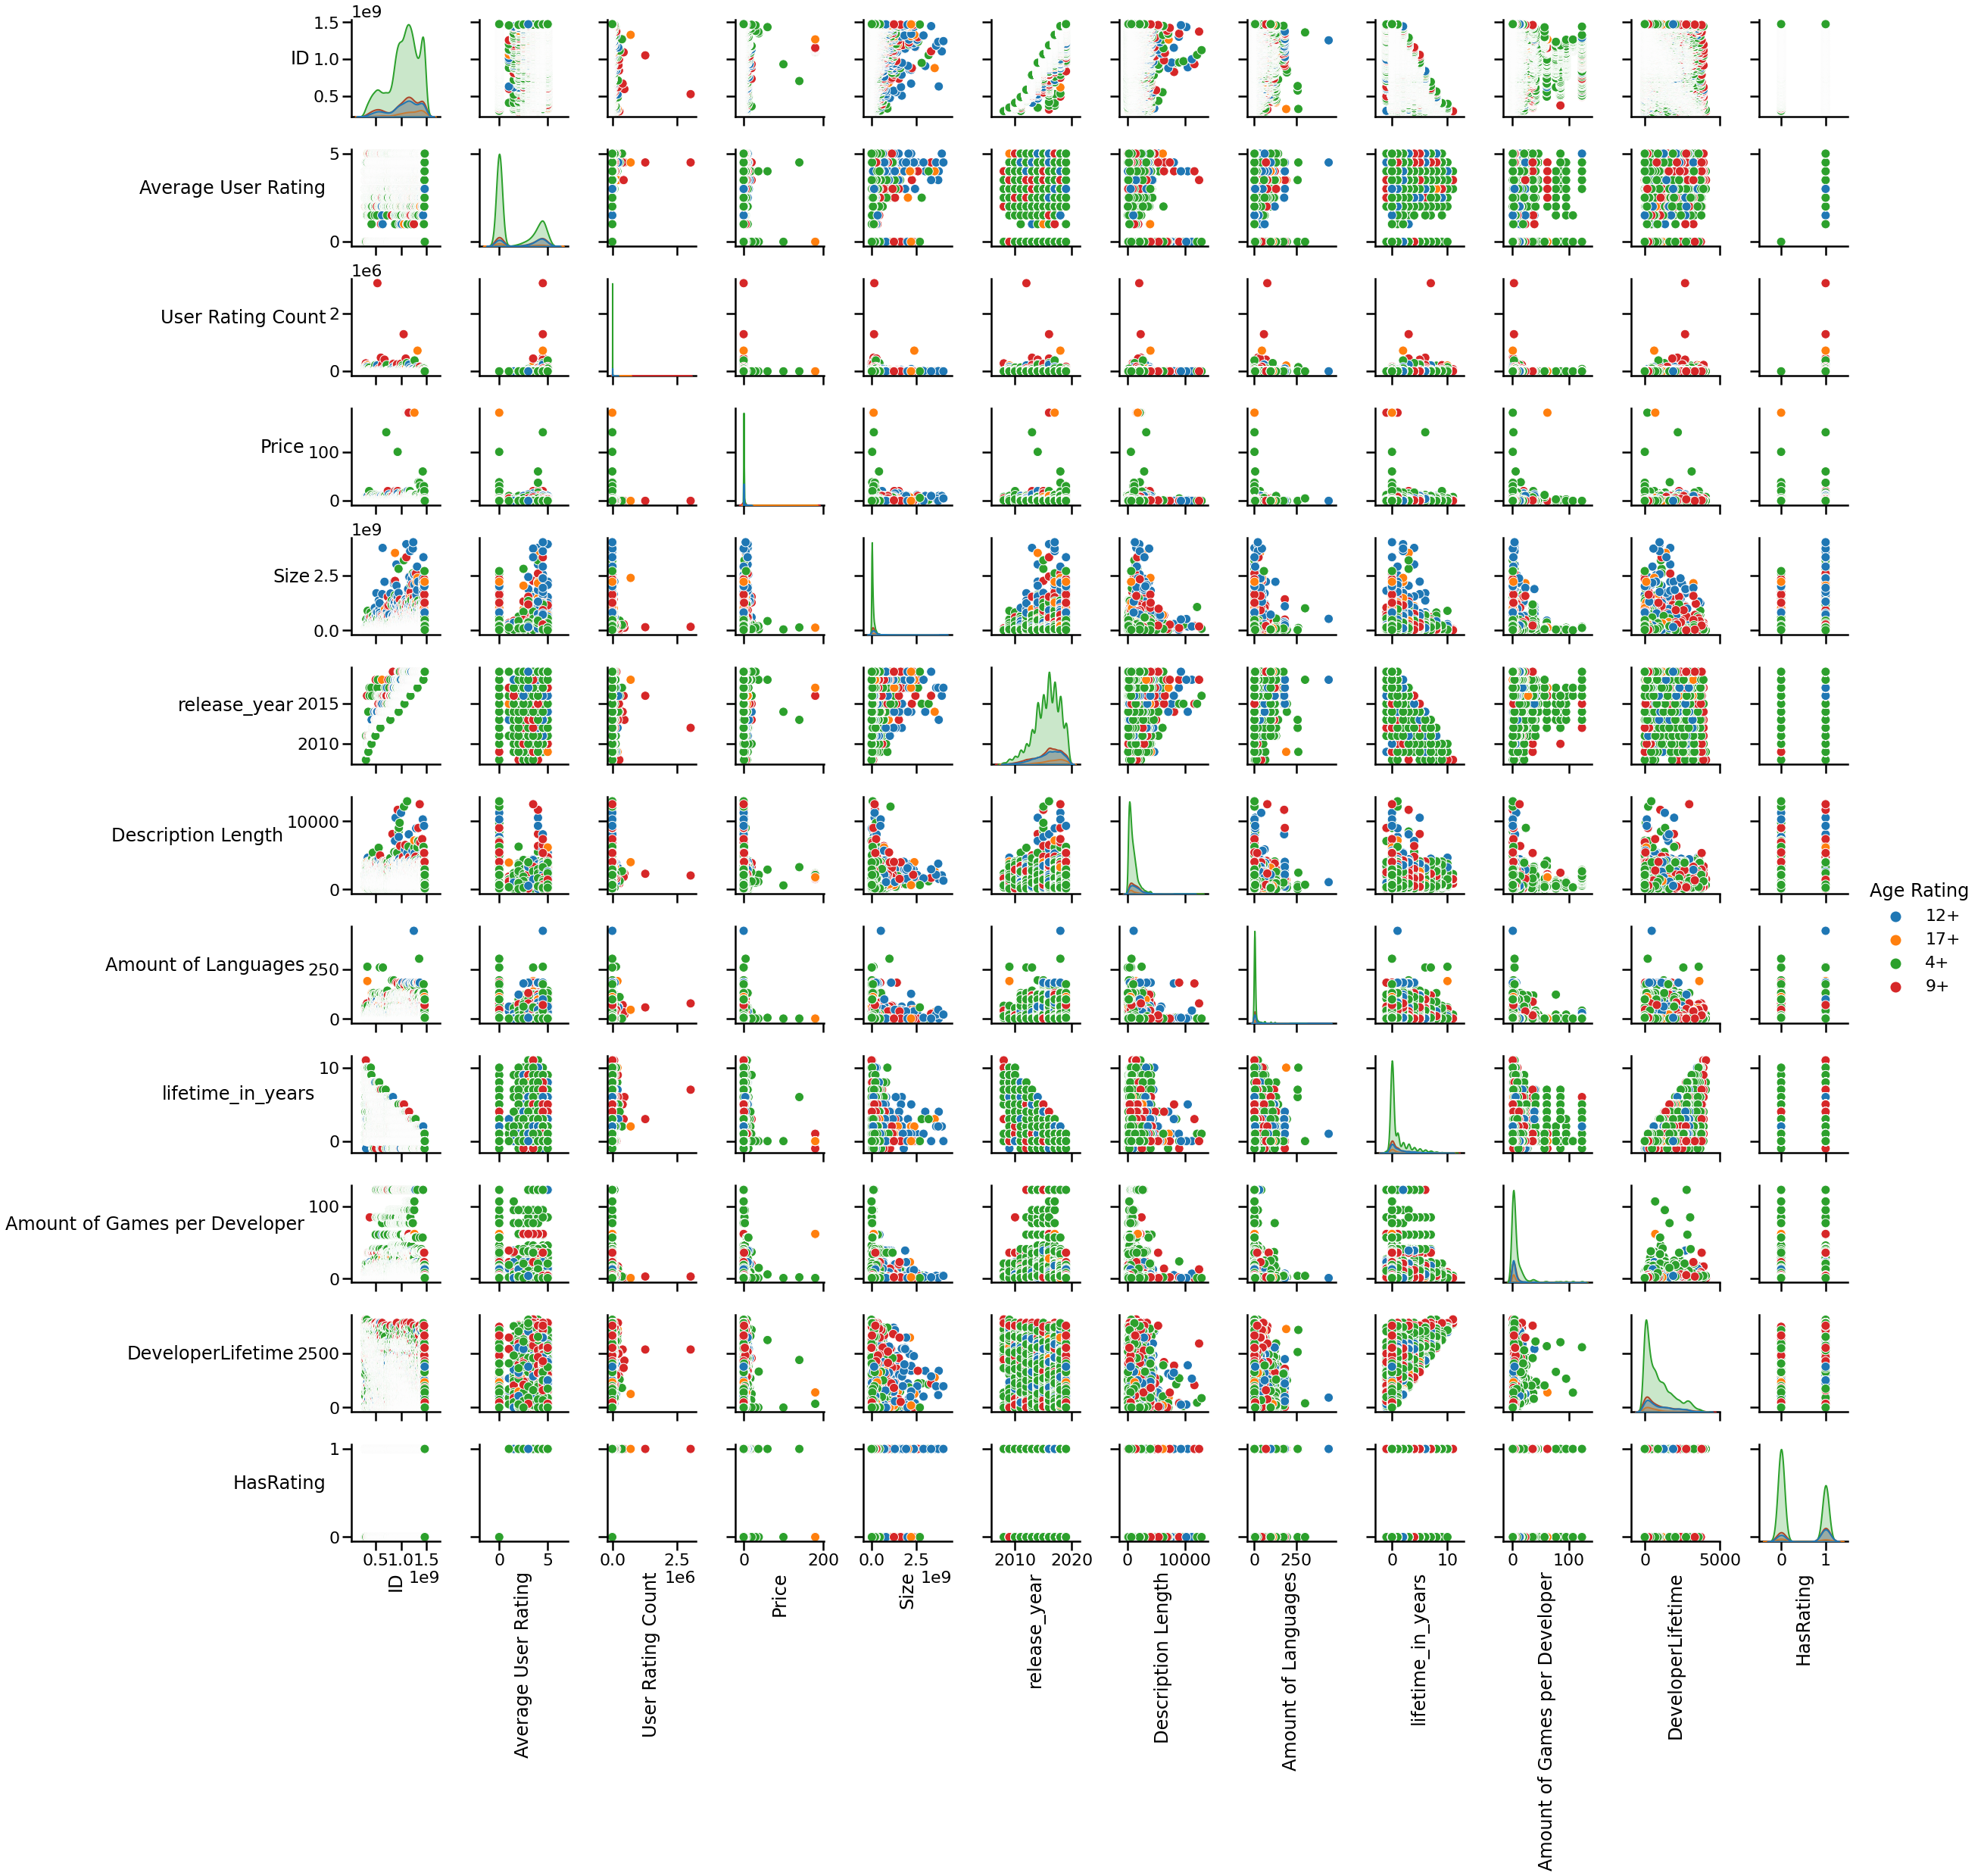

In [15]:

sns.set_context("poster")

g = sns.pairplot(game_data, hue="Age Rating")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    ax.yaxis.get_label().set_horizontalalignment('right')

sns.relplot(y='Size',x='Average User Rating', data = game_data, 
            col = 'Age Rating', col_order=["4+","9+","12+","17+"],
            kind='line', 
            hue='Age Rating', 
            ci=None,
            row='release_year')

<AxesSubplot:>

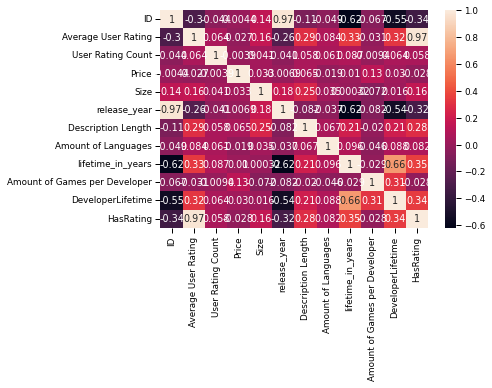

In [22]:
sns.set_context("paper")
sns.heatmap(game_data.corr(), annot = True)

<AxesSubplot:xlabel='Age Rating', ylabel='Average User Rating'>

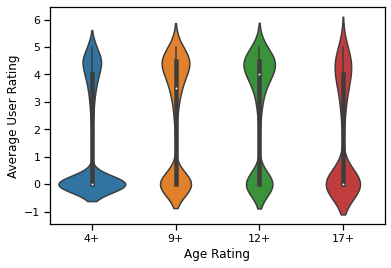

In [23]:
sns.set_context("notebook")
sns.violinplot(x="Age Rating",y="Average User Rating",data=game_data, order=["4+","9+","12+","17+"])

# Modeling

#### Groeperen en gemiddelde berekenen

[Text(0.5, 0, 'Release Year'), Text(0, 0.5, 'Average Price')]

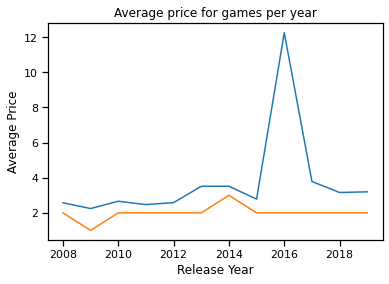

In [24]:
sns.set_context("notebook")
grouped = game_data[game_data["Price"] > 0].set_index("release_year").sort_index().reset_index().groupby("release_year")
peryear = pd.DataFrame(grouped["Price"].mean())
peryear2 = pd.DataFrame(grouped["Price"].median())
ax = sns.lineplot(data = peryear, x = "release_year", y = "Price")
ax = sns.lineplot(data = peryear2, x = "release_year", y = "Price")
ax.set(title='Average price for games per year')
ax.set(xlabel="Release Year", ylabel = "Average Price")

[Text(0.5, 0, 'release_year'), Text(0, 0.5, 'Average Review Rating')]

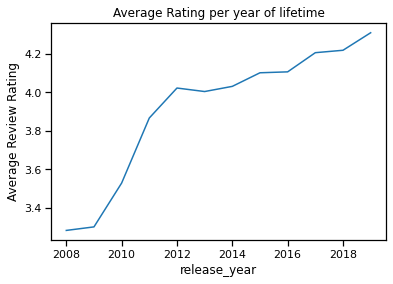

In [44]:
sns.set_context("notebook")
groupedlifetime = game_data[game_data["Average User Rating"] > 0].set_index("release_year").sort_index().reset_index().groupby("release_year")
pertime = pd.DataFrame(groupedlifetime["Average User Rating"].mean())
ax = sns.lineplot(data = pertime, x = "release_year", y = "Average User Rating")
ax.set(title='Average Rating per year of lifetime')
ax.set(xlabel="release_year", ylabel = "Average Review Rating")

In [46]:
#size en dev lifetime kmeans
df_model = normalizedData.copy()

In [47]:
n_clusters_to_test = range(2, 15)
inertias = []

for n in n_clusters_to_test:
    model = KMeans(n_clusters=n).fit(df_model[["release_year","DeveloperLifetime"]])
    inertias.append(model.inertia_)

<AxesSubplot:>

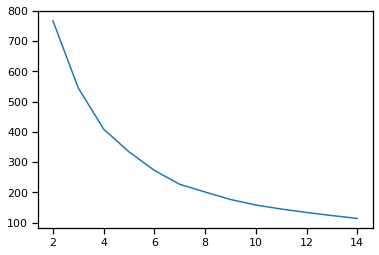

In [48]:
sns.lineplot(x=n_clusters_to_test, y=inertias)

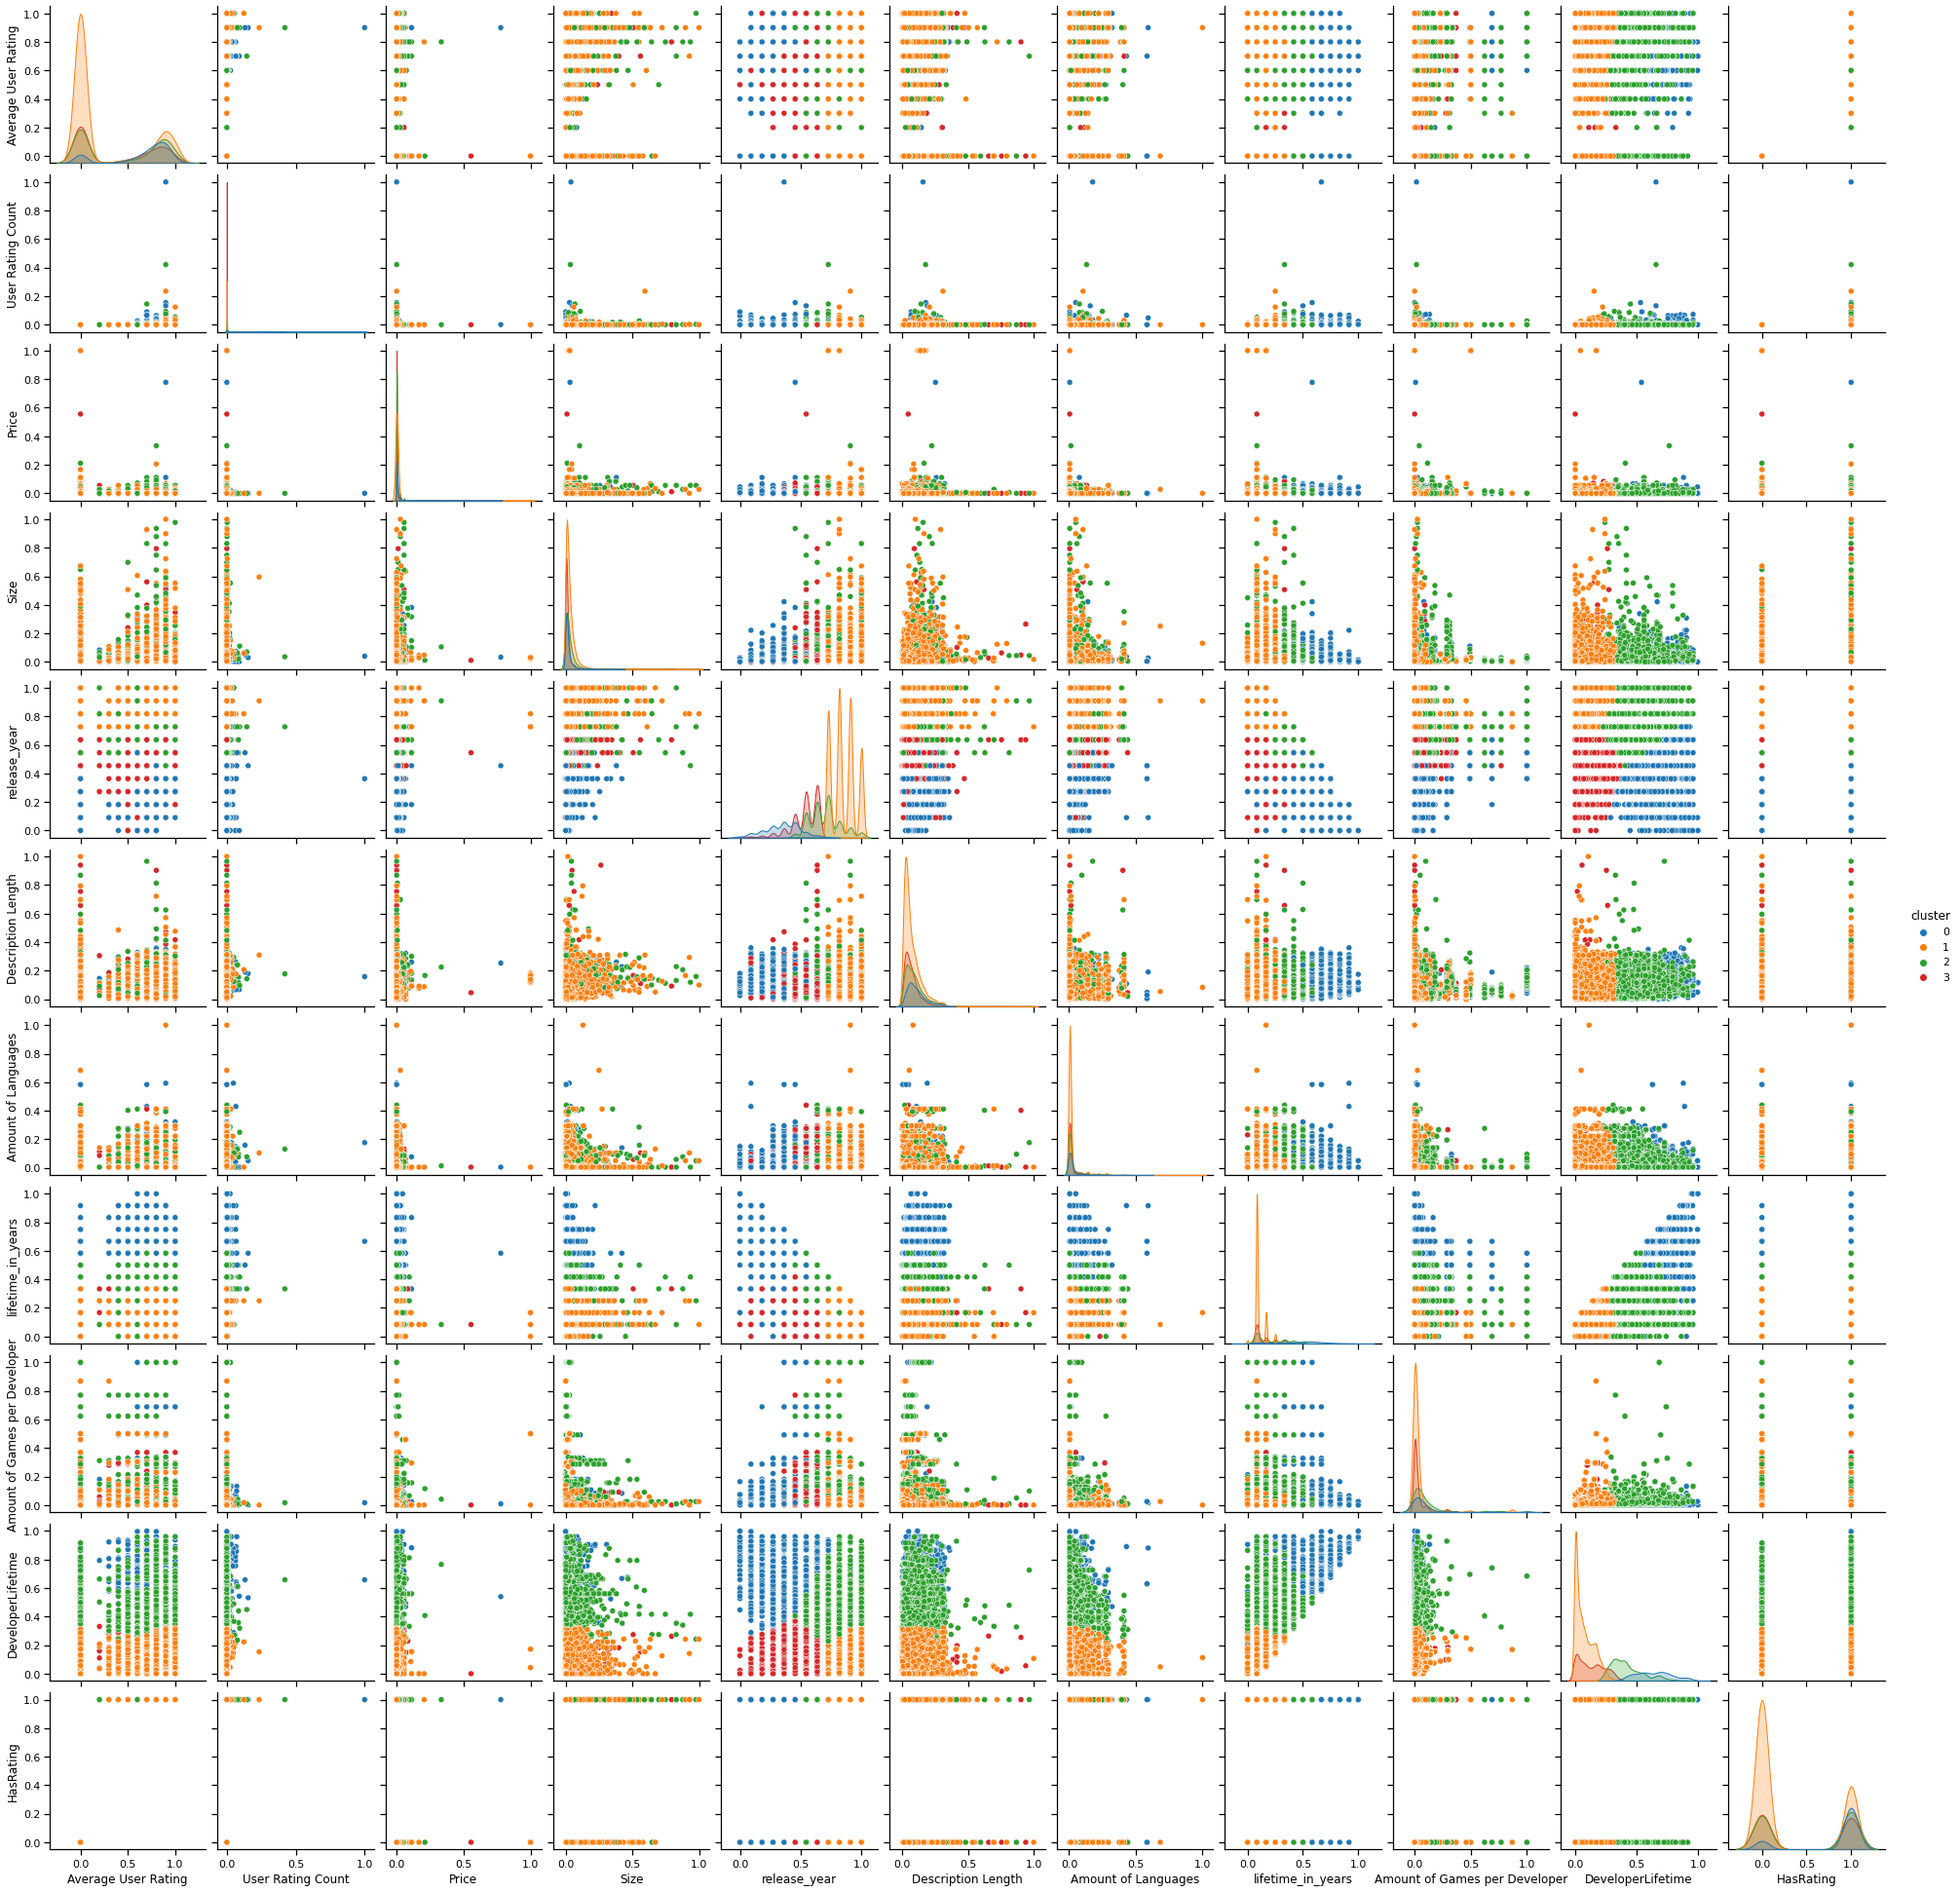

In [49]:
model = KMeans(n_clusters=4).fit(df_model[["release_year","DeveloperLifetime"]])

df_model['cluster'] = model.labels_
df_model['cluster'] = df_model['cluster'].astype('category')
sns.pairplot(df_model, hue='cluster')

In [20]:
game_data[game_data["Price"] < 100].sort_values("Price", ascending=False).head(15)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,release_year,lifetime,Description Length,Amount of Languages,lifetime_in_years,Amount of Games per Developer,StartOfDev,EndOfDev,DeveloperLifetime,HasRating
4846,https://apps.apple.com/us/app/arena-dodge/id93...,933223586,Arena Dodge,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0.0,99.99,,Contained within the Arena.\nGet millions of p...,...,2014,0 days,592,2,0,1,2014-03-11,2014-03-11,0,0
15031,https://apps.apple.com/us/app/goto-bridge-19/i...,1434393509,GOTO Bridge 19,The must-have bridge game,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,50.0,59.99,,"Discover the 19th edition of GOTO Bridge, the ...",...,2018,33 days,2908,6,0,6,2010-12-22,2019-07-17,3129,1
13730,https://apps.apple.com/us/app/blindfold-studen...,1350423680,Blindfold Student Pack 1,Navigation Skills,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0.0,37.99,,"""Blindfold Student Pack 1: Navigation skills i...",...,2018,2 days,2154,2,0,15,2015-01-07,2019-07-31,1666,0
14093,https://apps.apple.com/us/app/chess-openings-w...,1370631887,Chess Openings Wizard,Build 43 companion app,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,9.0,36.99,,"""Chess Openings Wizard is where tournament pla...",...,2018,0 days,1130,2,0,1,2018-12-22,2018-12-22,0,1
14281,https://apps.apple.com/us/app/strong-mind-esti...,1383404371,Strong Mind Estimator!,Refine your estimation skills!,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0.0,29.99,,Strong Mind Estimator presents mathematical pu...,...,2019,0 days,998,2,0,1,2019-06-04,2019-06-04,0,0
16421,https://apps.apple.com/us/app/maze-jam/id14588...,1458832763,Maze Jam,Jam Packed with Mazes,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0.0,29.99,,"Play artistically handcrafted, unusually brill...",...,2019,0 days,1184,2,0,1,2019-04-17,2019-04-17,0,0
2863,https://apps.apple.com/us/app/panzer-corps/id7...,736781904,Panzer Corps,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,249.0,19.99,"14.99, 59.99, 9.99, 14.99, 4.99, 14.99, 4.99, ...",Panzer Corps has been hailed as the \u201cthe ...,...,2013,968 days,3361,2,3,20,2012-12-13,2019-03-20,2288,1
276,https://apps.apple.com/us/app/smartgo-kifu/id3...,364854741,SmartGo Kifu,The premier tool to study Go,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,227.0,19.99,,"""SmartGo Kifu transforms your iPad into a Go b...",...,2010,3390 days,1359,34,9,4,2009-06-05,2019-04-19,3605,1
4609,https://apps.apple.com/us/app/battle-academy-2...,917359165,Battle Academy 2: Eastern Front,,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,83.0,19.99,9.99,This is a 32 bit app. You will always be able ...,...,2014,104 days,1740,2,0,20,2012-12-13,2019-03-20,2288,1
9162,https://apps.apple.com/us/app/spaceship-fighti...,1134849539,Spaceship Fighting Battle Wars 3D Full,,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0.0,19.99,,"Join space battles, shoot the enemies, collect...",...,2016,0 days,1286,2,0,37,2016-01-11,2017-10-03,631,0


## Scraper Test

In [ ]:
from itunes_app_scraper.scraper import AppStoreScraper
import pandas as pd

In [ ]:
scraper = AppStoreScraper()

In [ ]:
app_store_list = list(scraper.get_multiple_app_details([1318382054]))

In [ ]:
df = pd.DataFrame(app_store_list)

In [ ]:
df.columns